In [1]:
import pandas as pd

In [2]:
hcs = pd.read_excel("HotelClickStream.xls")

In [3]:
hcs.info()
hcs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3749 entries, 0 to 3748
Data columns (total 16 columns):
ID                   3749 non-null int64
DOMAIN_ID            3749 non-null uint64
MACHINE_ID           3749 non-null int64
SITE_SESSION_ID      3749 non-null int64
TRANS_FREQ           3749 non-null int64
DOMAIN_NAME          3749 non-null object
DIRECTP_D            3749 non-null int64
PROD_NAME            3749 non-null object
PROD_QTY             3749 non-null int64
PROD_TOTPRICE        3749 non-null float64
REF_DOMAIN_NAME      1687 non-null object
DURATION             3749 non-null float64
PAGES_VIEWED         3749 non-null int64
HOUSEHOLD_SIZE       3749 non-null int64
CHILDREN_D           3749 non-null int64
CONNECTIONSPEED_D    3749 non-null int64
dtypes: float64(2), int64(10), object(3), uint64(1)
memory usage: 468.7+ KB


,ID,DOMAIN_ID,MACHINE_ID,SITE_SESSION_ID,TRANS_FREQ,DOMAIN_NAME,DIRECTP_D,PROD_NAME,PROD_QTY,PROD_TOTPRICE,REF_DOMAIN_NAME,DURATION,PAGES_VIEWED,HOUSEHOLD_SIZE,CHILDREN_D,CONNECTIONSPEED_D
0,1525,13877604970862366012,85643811,4447900536932,1,ichotelsgroup.com,1,FT. LAUDERDALE AIRPORT/CRUISE - CROWNE PLAZA H...,32,2847.039993,NaN,23.328125,13,6,1,1
1,402,7101213156062330967,76460408,71774258860245,1,orbitz.com,0,WALT DISNEY WORLD MAGIC YOUR WAY TICKETS! N/A,1,2406.939995,yahoo.com,47.109375,17,2,1,1
2,233,7772350535129410931,74286590,3825866182640,1,hyatt.com,1,HYATT REGENCY MAUI RESORT SPA FRI 11 MAR 2011...,5,2168.000000,google.com,20.058594,19,1,0,1
3,2362,9530952911301729568,90015830,70000481538306,1,expedia.com,0,HOTEL - THE ADDRESS DUBAI MARINA ~SAT DEC/10/2...,5,1958.699997,NaN,47.546875,39,1,0,1
4,2738,4024709573451844450,91435029,5158448795791,2,starwoodhotels.com,1,HOTEL-W NEW YORK - TIMES SQUARE 08/18~08/21,3,1797.000000,whotels.com,14.599609,19,1,0,1


# 1 - Please first create the following 2 additional variables into your data
1) REF_D (create a dummy variable indicating whether the transaction was referenced from other website, if not, the final booking website was directly accessed. If no information provided for the variable REF_DOMAIN_NAME, REF_D = 0; otherwise REF_D = 1)
2) LOG_PRICE (take the log transformation of the variable PROD_TOTPRICE )

In [4]:
def impute_reference(cols):
    referred = cols[0]
    
    if pd.isna(referred):
        return 0
    else:
        return 1

In [5]:
hcs["REF_D"] = hcs[["REF_DOMAIN_NAME"]].apply(impute_reference, axis=1)

In [6]:
hcs.head()

,ID,DOMAIN_ID,MACHINE_ID,SITE_SESSION_ID,TRANS_FREQ,DOMAIN_NAME,DIRECTP_D,PROD_NAME,PROD_QTY,PROD_TOTPRICE,REF_DOMAIN_NAME,DURATION,PAGES_VIEWED,HOUSEHOLD_SIZE,CHILDREN_D,CONNECTIONSPEED_D,REF_D
0,1525,13877604970862366012,85643811,4447900536932,1,ichotelsgroup.com,1,FT. LAUDERDALE AIRPORT/CRUISE - CROWNE PLAZA H...,32,2847.039993,NaN,23.328125,13,6,1,1,0
1,402,7101213156062330967,76460408,71774258860245,1,orbitz.com,0,WALT DISNEY WORLD MAGIC YOUR WAY TICKETS! N/A,1,2406.939995,yahoo.com,47.109375,17,2,1,1,1
2,233,7772350535129410931,74286590,3825866182640,1,hyatt.com,1,HYATT REGENCY MAUI RESORT SPA FRI 11 MAR 2011...,5,2168.000000,google.com,20.058594,19,1,0,1,1
3,2362,9530952911301729568,90015830,70000481538306,1,expedia.com,0,HOTEL - THE ADDRESS DUBAI MARINA ~SAT DEC/10/2...,5,1958.699997,NaN,47.546875,39,1,0,1,0
4,2738,4024709573451844450,91435029,5158448795791,2,starwoodhotels.com,1,HOTEL-W NEW YORK - TIMES SQUARE 08/18~08/21,3,1797.000000,whotels.com,14.599609,19,1,0,1,1


In [7]:
import numpy as np

In [8]:
hcs.PROD_TOTPRICE.min()

0.0

In [9]:
hcs["LOG_PRICE"] = np.log1p(hcs["PROD_TOTPRICE"])
hcs.head()

,ID,DOMAIN_ID,MACHINE_ID,SITE_SESSION_ID,TRANS_FREQ,DOMAIN_NAME,DIRECTP_D,PROD_NAME,PROD_QTY,PROD_TOTPRICE,REF_DOMAIN_NAME,DURATION,PAGES_VIEWED,HOUSEHOLD_SIZE,CHILDREN_D,CONNECTIONSPEED_D,REF_D,LOG_PRICE
0,1525,13877604970862366012,85643811,4447900536932,1,ichotelsgroup.com,1,FT. LAUDERDALE AIRPORT/CRUISE - CROWNE PLAZA H...,32,2847.039993,NaN,23.328125,13,6,1,1,0,7.954386
1,402,7101213156062330967,76460408,71774258860245,1,orbitz.com,0,WALT DISNEY WORLD MAGIC YOUR WAY TICKETS! N/A,1,2406.939995,yahoo.com,47.109375,17,2,1,1,1,7.786527
2,233,7772350535129410931,74286590,3825866182640,1,hyatt.com,1,HYATT REGENCY MAUI RESORT SPA FRI 11 MAR 2011...,5,2168.000000,google.com,20.058594,19,1,0,1,1,7.682022
3,2362,9530952911301729568,90015830,70000481538306,1,expedia.com,0,HOTEL - THE ADDRESS DUBAI MARINA ~SAT DEC/10/2...,5,1958.699997,NaN,47.546875,39,1,0,1,0,7.580547
4,2738,4024709573451844450,91435029,5158448795791,2,starwoodhotels.com,1,HOTEL-W NEW YORK - TIMES SQUARE 08/18~08/21,3,1797.000000,whotels.com,14.599609,19,1,0,1,1,7.494430


# 1.a: Please provide a summary table showing the top 10 domain names (DOMAIN_NAME) that generated the most volume of transactions the report should look like the following Table. Please summarize briefly your observations from the results

In [10]:
df1a = hcs.groupby("DOMAIN_NAME")["TRANS_FREQ"].count().reset_index(name='# of Transactions').sort_values(by='# of Transactions', ascending=False).head(10)
df1a.index = pd.RangeIndex(start=1, stop = 11, step=1)
df1a.insert(0, column="Rank",value = df1a.index.values)
print(df1a.to_string(index=False))

 Rank       DOMAIN_NAME  # of Transactions
    1      marriott.com                524
    2        hilton.com                438
    3        hotels.com                400
    4       expedia.com                380
    5     priceline.com                309
    6  choicehotels.com                297
    7       jetblue.com                229
    8       hotwire.com                217
    9   bestwestern.com                120
   10        orbitz.com                109


Based on the results above, it seems that the top branded hotel groups like marriott and hilton have largest number of transactions when compared individually with the other online hotel agencies. But collectively, # of transactions done on online hotel agencies are far more than transactions done on standalone hotel website, because online hotel agencies have many hotels under one website, that the customers can chose from.

# 1.b: Please provide a summary table showing the top 10 reference domain names (REF_DOMAIN_NAME) that generated the most volume of transactions. The report should look like the following Table. Please summarize briefly your observations from the results.

In [11]:
df1b = hcs.groupby("REF_DOMAIN_NAME")["TRANS_FREQ"].count().reset_index(name='# of Transactions').sort_values(by='# of Transactions', ascending=False).head(10)
df1b.index = pd.RangeIndex(start=1, stop = 11, step=1)
df1b.insert(0, column="Rank",value = df1b.index.values)
print(df1b.to_string(index=False))

 Rank    REF_DOMAIN_NAME  # of Transactions
    1         google.com                620
    2          yahoo.com                222
    3           bing.com                129
    4            aol.com                 53
    5     comfortinn.com                 48
    6        jetblue.com                 43
    7     qualityinn.com                 29
    8  comfortsuites.com                 22
    9          kayak.com                 20
   10    mywebsearch.com                 17


Based on the above results, most of the references came from Google, as it is most widely used search engine by people across the globe. If we notice, the top 4 reference websites are all search engine companies. 

# 1.c: Please provide summary statistics (N, Max, Min, Mean, and Std.) for variables: DIRECTP_D; REF_D; DURATION; PAGES_VIEWED; LOG_PRICE; and TRANS_FREQ. Please report your summary statistics table and provide short descriptions (a few bullet points) of your observations.

In [12]:
hcs[["DIRECTP_D","REF_D", "DURATION", "PAGES_VIEWED", "LOG_PRICE", "TRANS_FREQ"]].describe()

,DIRECTP_D,REF_D,DURATION,PAGES_VIEWED,LOG_PRICE,TRANS_FREQ
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,0.481462,0.449987,25.317508,18.331288,4.439926,2.981328
std,0.499723,0.497559,22.806497,16.636523,1.615478,4.120927
min,0.000000,0.000000,0.029999,1.000000,0.000000,1.000000
25%,0.000000,0.000000,9.449219,8.000000,4.289774,1.000000
50%,0.000000,0.000000,17.777344,13.000000,4.762088,2.000000
75%,1.000000,1.000000,33.656250,23.000000,5.303205,3.000000
max,1.000000,1.000000,227.343750,141.000000,7.954386,30.000000


Based on above descriptive statistics we could see the following observations:
1) Users on an average spend about 25 minutes on the website.
2) As the standard deviation is 22 minutes which is high, the data spread is wide and away from the mean i.e. 68% of users in the given dataset spend time on website between 3 minutes to 47 minutes (1 std.)
3) Since the mean is 25 minutes, min is 0.02 minutes and max is 227.34 minutes, this tells that the data is positively skewed.

# 1d: Please make a Scatter Plot and a Histogram for any of the variables of your own interests in the data. Then report any insights you may be able draw from the charts.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
hcs.head(1)

,ID,DOMAIN_ID,MACHINE_ID,SITE_SESSION_ID,TRANS_FREQ,DOMAIN_NAME,DIRECTP_D,PROD_NAME,PROD_QTY,PROD_TOTPRICE,REF_DOMAIN_NAME,DURATION,PAGES_VIEWED,HOUSEHOLD_SIZE,CHILDREN_D,CONNECTIONSPEED_D,REF_D,LOG_PRICE
0,1525,13877604970862366012,85643811,4447900536932,1,ichotelsgroup.com,1,FT. LAUDERDALE AIRPORT/CRUISE - CROWNE PLAZA H...,32,2847.039993,NaN,23.328125,13,6,1,1,0,7.954386


C:\Users\jashd\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\jashd\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


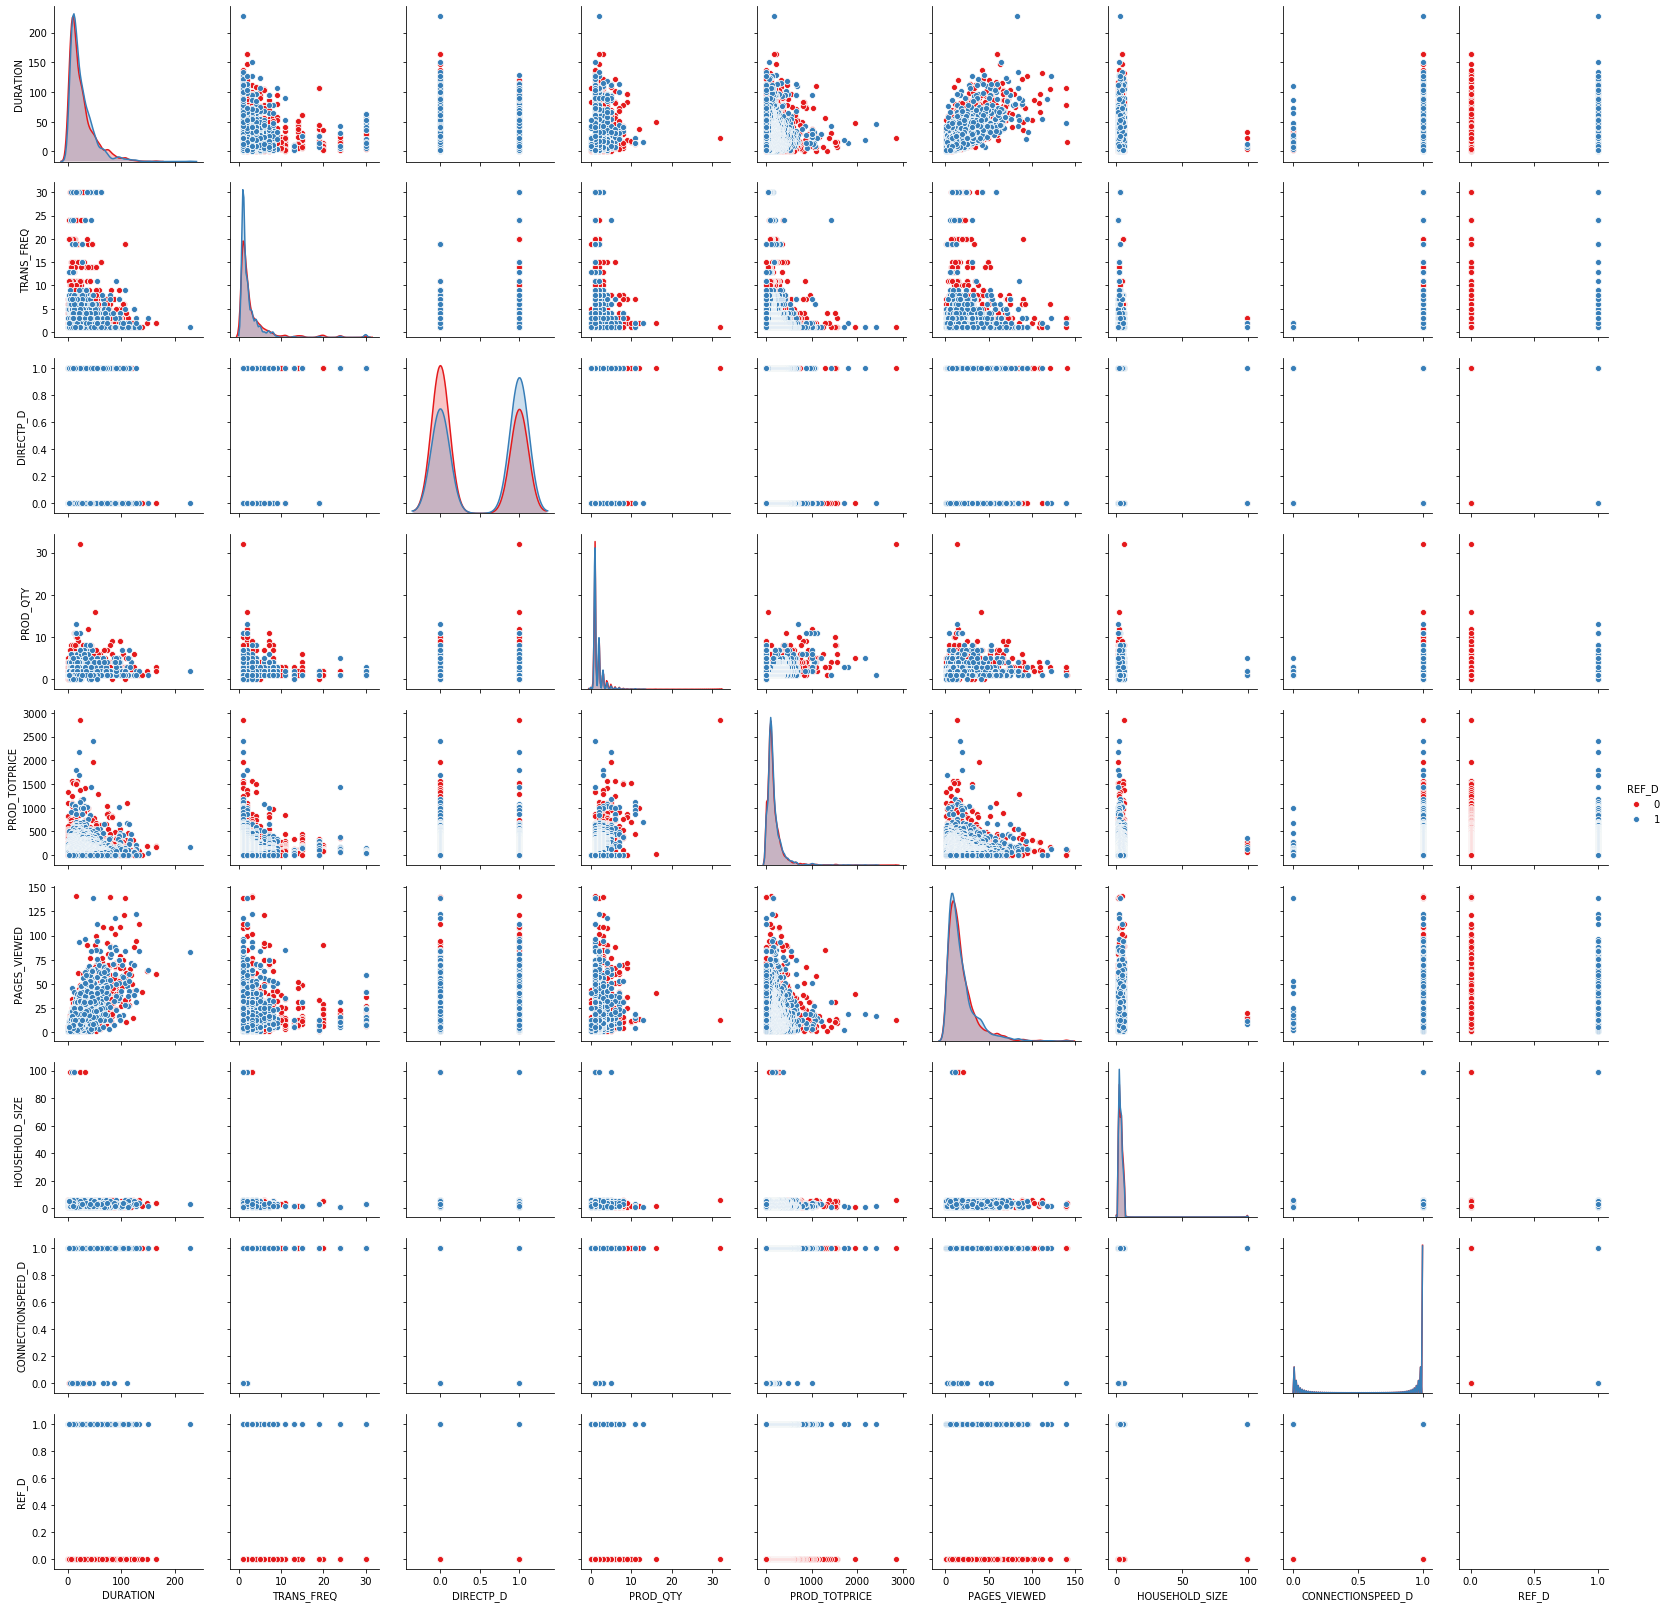

In [15]:
sns.pairplot(hcs[["DURATION", "TRANS_FREQ", "DIRECTP_D", "PROD_QTY", "PROD_TOTPRICE", "PAGES_VIEWED", "HOUSEHOLD_SIZE", "CONNECTIONSPEED_D", "REF_D"]], hue = "REF_D", palette='Set1')

Based on the above pairplots, I donot see any multicollinearity in the above variables.

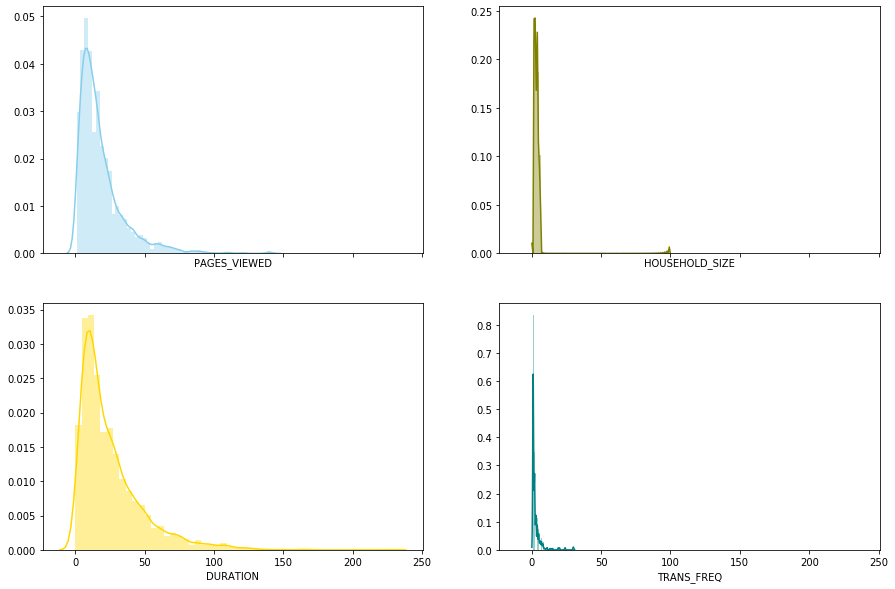

In [16]:
f, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True)
sns.distplot( hcs["PAGES_VIEWED"] , color="skyblue", ax=axes[0, 0])
sns.distplot( hcs["HOUSEHOLD_SIZE"] , color="olive", ax=axes[0, 1])
sns.distplot( hcs["DURATION"] , color="gold", ax=axes[1, 0])
sns.distplot( hcs["TRANS_FREQ"] , color="teal", ax=axes[1, 1])


Based on the above distplots, Pages_viewed, Duration, Trans_Freq and Household_size are all positively skewed.

# 2. a) Please use the linear regression technique to answer the question on “what are the factors that influence how much time people spend on a website?”You should try different set of independent variables in the data set to see which one(s) has significant results (create dummy variables for some of the non-numerical variables if needed). Please report 1) the final set of independent variables you have chosen and why you have chosen them; and 2) the estimated regression equation with simple explanations for each estimated coefficient (β). Please ONLY report and interpret your final regression results.

In [17]:
# Lets encode the categorical variables DOMAIN_NAME & REF_DOMAIN_NAME
from sklearn.preprocessing import LabelEncoder

In [18]:
# Lets clean up the null value in REF_DOMAIN_NAME to "No Ref"
hcs = hcs.fillna({"REF_DOMAIN_NAME":"No Ref"})

In [19]:
hcs.DOMAIN_NAME.unique()

array(['ichotelsgroup.com', 'orbitz.com', 'hyatt.com', 'expedia.com',
       'starwoodhotels.com', 'jetblue.com', 'hotwire.com',
       'bestwestern.com', 'travelocity.com', 'hotels.com', 'ramada.com',
       'hilton.com', 'wwte1.com', 'travelnow.com', 'cheaptickets.com',
       'choicehotels.com', 'netbooker.com', 'priceline.com',
       'ritzcarlton.com', 'marriott.com', 'wyndham.com', 'radisson.com',
       'daysinn.com', 'res99.com', 'yahoo.net', 'super8.com', 'hojo.com',
       'southwest.com', 'countryinns.com', 'aol.com',
       'americanexpress-travel.com', 'travelodge.com',
       'wingatehotels.com'], dtype=object)

In [20]:
# Label Encoding for DOMAIN_NAME. The code is stored in the new column DOMAIN_CODE
# Since the REF_DOMAIN_NAME is already used indirectly using REF_D. I will be not be encoding the same.
lb_domain_name = LabelEncoder()
hcs["DOMAIN_CODE"] = lb_domain_name.fit_transform(hcs["DOMAIN_NAME"])
hcs.head(5)

,ID,DOMAIN_ID,MACHINE_ID,SITE_SESSION_ID,TRANS_FREQ,DOMAIN_NAME,DIRECTP_D,PROD_NAME,PROD_QTY,PROD_TOTPRICE,REF_DOMAIN_NAME,DURATION,PAGES_VIEWED,HOUSEHOLD_SIZE,CHILDREN_D,CONNECTIONSPEED_D,REF_D,LOG_PRICE,DOMAIN_CODE
0,1525,13877604970862366012,85643811,4447900536932,1,ichotelsgroup.com,1,FT. LAUDERDALE AIRPORT/CRUISE - CROWNE PLAZA H...,32,2847.039993,No Ref,23.328125,13,6,1,1,0,7.954386,13
1,402,7101213156062330967,76460408,71774258860245,1,orbitz.com,0,WALT DISNEY WORLD MAGIC YOUR WAY TICKETS! N/A,1,2406.939995,yahoo.com,47.109375,17,2,1,1,1,7.786527,17
2,233,7772350535129410931,74286590,3825866182640,1,hyatt.com,1,HYATT REGENCY MAUI RESORT SPA FRI 11 MAR 2011...,5,2168.000000,google.com,20.058594,19,1,0,1,1,7.682022,12
3,2362,9530952911301729568,90015830,70000481538306,1,expedia.com,0,HOTEL - THE ADDRESS DUBAI MARINA ~SAT DEC/10/2...,5,1958.699997,No Ref,47.546875,39,1,0,1,0,7.580547,7
4,2738,4024709573451844450,91435029,5158448795791,2,starwoodhotels.com,1,HOTEL-W NEW YORK - TIMES SQUARE 08/18~08/21,3,1797.000000,whotels.com,14.599609,19,1,0,1,1,7.494430,24


In [21]:
import statsmodels.api as sm

In [22]:
from scipy.stats import pearsonr

In [23]:
# Check Pearson Corelation between all Independent variables to remove multicollinearity
iv_list = ['DOMAIN_CODE','TRANS_FREQ','DIRECTP_D', 'PROD_QTY', 'PROD_TOTPRICE','PAGES_VIEWED', 'HOUSEHOLD_SIZE',
       'CHILDREN_D', 'CONNECTIONSPEED_D', 'REF_D', 'LOG_PRICE']

cor_dv = set()
for i in range(0, len(iv_list)):
    for j in range(1, len(iv_list)-1):
        if iv_list[i] != iv_list[j] and iv_list[j] not in cor_dv:
            res =  pearsonr(hcs[iv_list[i]], hcs[iv_list[j]])
            if res[1] < 0.05 and abs(res[0]) < 0.70:
                cor_dv.add(iv_list[i])
                print(f"The Pearson Corelation for {iv_list[i]} and {iv_list[j]} are {res[0], res[1]}")

print("\n Based on the Pearson Corelation, Below list of DV that don't have multicollinearity")              
print("\t",cor_dv)
        

The Pearson Corelation for DOMAIN_CODE and DIRECTP_D are (-0.23129817005038764, 1.0276465286997154e-46)
The Pearson Corelation for DOMAIN_CODE and PAGES_VIEWED are (0.09714356619793295, 2.5204051228027408e-09)
The Pearson Corelation for TRANS_FREQ and DIRECTP_D are (0.1632090253401545, 8.529738728889125e-24)
The Pearson Corelation for TRANS_FREQ and PROD_QTY are (-0.06569719541569775, 5.6833461360737465e-05)
The Pearson Corelation for TRANS_FREQ and PROD_TOTPRICE are (-0.05299169160227369, 0.0011710833179771763)
The Pearson Corelation for TRANS_FREQ and HOUSEHOLD_SIZE are (-0.03730821202377248, 0.022349154690268963)
The Pearson Corelation for TRANS_FREQ and CHILDREN_D are (-0.08599886413361933, 1.3373884087568167e-07)
The Pearson Corelation for TRANS_FREQ and CONNECTIONSPEED_D are (0.03654547766577451, 0.025244074108244228)
The Pearson Corelation for TRANS_FREQ and REF_D are (-0.07970175022674529, 1.0279468399799554e-06)
The Pearson Corelation for DIRECTP_D and PROD_QTY are (-0.1226277

In [24]:
# Check Pearson Corelation for all IVs vs DV and consider only significant corelation variables.
cor_ivdv = []
del_l = []
for i in iv_list:
    res =  pearsonr(hcs[i], hcs['DURATION'])
    if res[1] < 0.05:
        cor_ivdv.append(i)
        print(f"The Pearson Corelation for {i} and DURATION are {res[0], res[1]}")
    else:
        del_l.append(i)
print("\n Based on the Pearson Corelation, Below list of IV that has significant corelation with DV - DURATION:")              
print("\t",cor_ivdv)
print("\n List of variables that can be dropped from the dataframe are:")
print("\t",del_l)

The Pearson Corelation for DOMAIN_CODE and DURATION are (0.05898643996133956, 0.0003019427518825999)
The Pearson Corelation for DIRECTP_D and DURATION are (-0.18200167861751276, 2.7753543208190736e-29)
The Pearson Corelation for PROD_QTY and DURATION are (0.1271217337710795, 5.599137613824228e-15)
The Pearson Corelation for PROD_TOTPRICE and DURATION are (0.032113478651351654, 0.049283589013318065)
The Pearson Corelation for PAGES_VIEWED and DURATION are (0.6850714969486446, 0.0)
The Pearson Corelation for CHILDREN_D and DURATION are (0.04457028022909549, 0.006344132849191042)
The Pearson Corelation for LOG_PRICE and DURATION are (-0.07296735419351735, 7.742037412080361e-06)

 Based on the Pearson Corelation, Below list of IV that has significant corelation with DV - DURATION:
	 ['DOMAIN_CODE', 'DIRECTP_D', 'PROD_QTY', 'PROD_TOTPRICE', 'PAGES_VIEWED', 'CHILDREN_D', 'LOG_PRICE']

 List of variables that can be dropped from the dataframe are:
	 ['TRANS_FREQ', 'HOUSEHOLD_SIZE', 'CONNECTIO

In [25]:
corr_mat = hcs.drop(['ID', 'DOMAIN_ID', 'MACHINE_ID', 'SITE_SESSION_ID',
       'DOMAIN_NAME', 'PROD_NAME',
       'REF_DOMAIN_NAME'], axis=1)

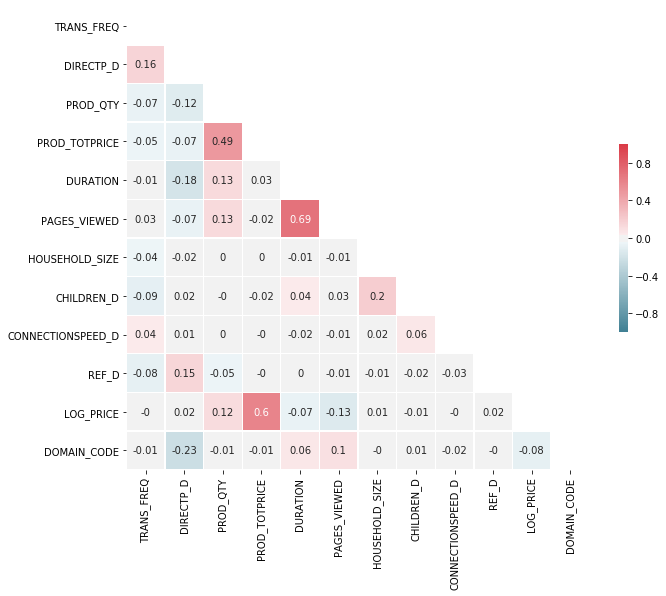

In [26]:
# Correlation Matrix

import numpy as np
# Generate and visualize the correlation matrix
corr = corr_mat.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(10, 10))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.3, cbar_kws={"shrink": .3}, annot=True)

plt.tight_layout()

Based on the above correlation matrix, we don't see any multicollinearity.

In [27]:
hcs.columns

Index(['ID', 'DOMAIN_ID', 'MACHINE_ID', 'SITE_SESSION_ID', 'TRANS_FREQ',
       'DOMAIN_NAME', 'DIRECTP_D', 'PROD_NAME', 'PROD_QTY', 'PROD_TOTPRICE',
       'REF_DOMAIN_NAME', 'DURATION', 'PAGES_VIEWED', 'HOUSEHOLD_SIZE',
       'CHILDREN_D', 'CONNECTIONSPEED_D', 'REF_D', 'LOG_PRICE', 'DOMAIN_CODE'],
      dtype='object')

In [28]:
# Model 1 - This give a good Adj R-Squared result of 49% however the F-stat is low compared to Model 4 below
# 'PROD_QTY' & LOG_PRICE are not significant based on the p-value. Also we could drop either PROD_TOTPRICE or LOG_PRICE
# df_numeric = hcs[['DOMAIN_CODE', 'DIRECTP_D', 'PROD_QTY', 'PROD_TOTPRICE', 'PAGES_VIEWED', 'CHILDREN_D', 'LOG_PRICE']]

# Model 2 - This give a good Adj R-Squared result of 49% however the F-stat is low compared to Model 4 below
# df_numeric = hcs[['DOMAIN_CODE', 'DIRECTP_D', 'PROD_TOTPRICE', 'PAGES_VIEWED', 'CHILDREN_D']]

# Model 3 - # Model 2 - The Adj R-Squared results are 49% however the F-stat is low compared to Model 4 below 
# df_numeric = hcs[['DOMAIN_CODE', 'DIRECTP_D', 'PAGES_VIEWED', 'CHILDREN_D', 'PROD_TOTPRICE']]

# Model 4 - These 3 parameters are the best to be used where the R-Square value and Adjusted R-Square are 49% and 
# F-stats value is the max when compared to above model parameters.
# See below the OLS results
df_numeric = hcs[['DIRECTP_D', 'PAGES_VIEWED', 'PROD_TOTPRICE']]

In [29]:
df_numeric.describe()

,DIRECTP_D,PAGES_VIEWED,PROD_TOTPRICE
count,3749.000000,3749.000000,3749.000000
mean,0.481462,18.331288,163.859624
std,0.499723,16.636523,184.484515
min,0.000000,1.000000,0.000000
25%,0.000000,8.000000,71.950000
50%,0.000000,13.000000,115.990000
75%,1.000000,23.000000,199.980000
max,1.000000,141.000000,2847.039993


In [30]:
# Looking at the descriptive statistics it makes sense to scale the data as PROD_TOT_PRICE has a higher value when 
# compared to DIRECTP_D and PAGES_VIEWED
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [31]:
# Fit the scaled values
df_encoded_scaled = sc.fit_transform(df_numeric)

In [32]:
df_encoded_scaled

array([[ 1.03779011, -0.32049964, 14.54614384],
       [-0.96358598, -0.08003271, 12.16025956],
       [ 1.03779011,  0.04020076, 10.86491036],
       ...,
       [ 1.03779011,  0.46101789, -0.88832107],
       [-0.96358598,  0.76160155, -0.88832107],
       [-0.96358598, -0.38061637, -0.88832107]])

In [33]:
# Add constant
iv_encoded = sm.add_constant(df_encoded_scaled)

In [34]:
# Fit the model
model1 = sm.OLS(hcs.DURATION, iv_encoded)
res_encd = model1.fit()
print(res_encd.summary())

                            OLS Regression Results                            
Dep. Variable:               DURATION   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     1198.
Date:                Mon, 30 Mar 2020   Prob (F-statistic):               0.00
Time:                        22:20:11   Log-Likelihood:                -15781.
No. Observations:                3749   AIC:                         3.157e+04
Df Residuals:                    3745   BIC:                         3.160e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.3175      0.266     95.112      0.0

# Based on the above results, after trying out multiple models with various parameters(Refer cell 34). I could see that the Adj. R-Squared value is at 49% with F-stat at 1198 for the parameters: 'DIRECTP_D', 'PAGES_VIEWED', 'PROD_TOTPRICE', which is the goodness of fit for the model.

The regression equation would be: Duration (DV) = (-3.07)x1 + (15.44)x2 + (0.89)x3 + 25.31
where x1 = DIRECTP_D, x2 = PAGES_VIEWED, x3 = PROD_TOTPRICE

Explaination of the regression equation:
1) Keeping other variables constant Duration increases by 15 seconds for each page viewed.
2) Keeping other variables constant Duration increases by 0.89 minutes when reviewing the prod_totprice
3) Keeping other variables constant Duration decreased by 3.07 minutes when the customer did a transaction through reference website - (This is inferred based on the mean value of DIRECTP_D which is < 0.5 which means there are more indirect transactions than direct website transactions).

# 2b) Please use the linear regression technique to answer the question on “what are the factors that influence how many pages people views when visiting a website?”And decide your IVs by conducting the similar exercises in the above analysis. Please ONLY report and interpret your final regression results.

In [35]:
# Check Pearson Corelation for all IVs vs DV and consider only significant corelation variables.
iv_list2 = ['DOMAIN_CODE','TRANS_FREQ','DIRECTP_D', 'PROD_QTY', 'PROD_TOTPRICE', 'HOUSEHOLD_SIZE',
       'CHILDREN_D', 'CONNECTIONSPEED_D', 'REF_D', 'LOG_PRICE', 'DURATION']
cor_ivdv2 = []
del_l2 = []
for i in iv_list2:
    res =  pearsonr(hcs[i], hcs['PAGES_VIEWED'])
    if res[1] < 0.05:
        cor_ivdv2.append(i)
        print(f"The Pearson Corelation for {i} and PAGES_VIEWED are {res[0], res[1]}")
    else:
        del_l2.append(i)
print("\n Based on the Pearson Corelation, Below list of IV that has significant corelation with DV - DURATION:")              
print("\t",cor_ivdv2)
print("\n List of variables that can be dropped from the dataframe are:")
print("\t",del_l2)

The Pearson Corelation for DOMAIN_CODE and PAGES_VIEWED are (0.09714356619793295, 2.5204051228027408e-09)
The Pearson Corelation for DIRECTP_D and PAGES_VIEWED are (-0.06566123654458968, 5.736919897386752e-05)
The Pearson Corelation for PROD_QTY and PAGES_VIEWED are (0.12627838705261366, 8.465259595338043e-15)
The Pearson Corelation for CHILDREN_D and PAGES_VIEWED are (0.033867159863631785, 0.03812035478669465)
The Pearson Corelation for LOG_PRICE and PAGES_VIEWED are (-0.12853088924640588, 2.7892546473508024e-15)
The Pearson Corelation for DURATION and PAGES_VIEWED are (0.6850714969486446, 0.0)

 Based on the Pearson Corelation, Below list of IV that has significant corelation with DV - DURATION:
	 ['DOMAIN_CODE', 'DIRECTP_D', 'PROD_QTY', 'CHILDREN_D', 'LOG_PRICE', 'DURATION']

 List of variables that can be dropped from the dataframe are:
	 ['TRANS_FREQ', 'PROD_TOTPRICE', 'HOUSEHOLD_SIZE', 'CONNECTIONSPEED_D', 'REF_D']


Run1 - Adj R-Sqr: 48%, F-stat: 592. 
    # CHILDREN_D is not significant so I dropped the column, also since PROD_TOTPRICE was dropped, lets drop LOG_PRICE too
Run2 - Adj R-Sqr: 48%, F-stat: 866 Params: ['DOMAIN_CODE', 'DIRECTP_D', 'PROD_QTY', 'DURATION']

In [36]:
hcs[['DOMAIN_CODE', 'DIRECTP_D', 'PROD_QTY', 'DURATION']].describe()

,DOMAIN_CODE,DIRECTP_D,PROD_QTY,DURATION
count,3749.000000,3749.000000,3749.000000,3749.000000
mean,12.263270,0.481462,1.717258,25.317508
std,6.456883,0.499723,1.387385,22.806497
min,0.000000,0.000000,0.000000,0.029999
25%,8.000000,0.000000,1.000000,9.449219
50%,11.000000,0.000000,1.000000,17.777344
75%,15.000000,1.000000,2.000000,33.656250
max,32.000000,1.000000,32.000000,227.343750


In [37]:
df_encoded_scaled2 = sc.fit_transform(hcs[['DOMAIN_CODE', 'DIRECTP_D', 'PROD_QTY', 'DURATION']])

In [38]:
iv2 = sm.add_constant(df_encoded_scaled2)

In [39]:
model2 = sm.OLS(hcs.PAGES_VIEWED, iv2)
res2 = model2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:           PAGES_VIEWED   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     866.0
Date:                Mon, 30 Mar 2020   Prob (F-statistic):               0.00
Time:                        22:20:11   Log-Likelihood:                -14632.
No. Observations:                3749   AIC:                         2.927e+04
Df Residuals:                    3744   BIC:                         2.931e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3313      0.196     93.560      0.0

# Based on the above results, after trying out multiple models with various parameters(Refer cell 34). I could see that the Adj. R-Squared value is at 48% with F-stat at 866 for the parameters: 'DOMAIN_CODE', 'DIRECTP_D', 'PROD_QTY', 'DURATION', which is the goodness of fit for the model.

PAGES_VIEWED(DV) = 1.27x1 + 1.39x2 + 0.83x3 + 11.46x4 + 18.33
where x1 =  DOMAIN_CODE, x2 = DIRECTP_D, x3 = PROD_QTY, x4 = DURATION

1) When all factors are kept constant except for DOMAIN_CODE, for every 1.27 of Domain (website), a page is viewed.
2) When all factors are kept constant except for DURATION, a page is viewed for 11.46 minutes.
3) When all factors are kept constant except for PROD_QTY, for every 0.83 products sold, a page is viewed.

# 2d) Please summarize your observations by comparing the results from a) and b).

# By Comparing and Contrasting the regression results for response variables "DURATION" and "PAGES_VIEWED" we can infer that, though the adjusted R square value is < 50%, the model 1 and 2 helps identify the predictor variables which has significant influence on the dependent variables and also what we notice is, there is a high co-relation between DURATION and PAGES_VIEWED.